# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [472]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [473]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [474]:
df = pd.read_csv("drive/MyDrive/dicoding/dataset/Dataset_inisiasi.csv")
df

,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,days_since_start,Cluster
0,photo,2018-04-21 22:45:00,150.0,0.0,0.0,150.0,0.0,0.0,0.0,0.0,0.0,2106.0,0
1,photo,2018-04-21 02:29:00,111.0,0.0,0.0,111.0,0.0,0.0,0.0,0.0,0.0,2105.0,0
2,photo,2018-04-18 03:22:00,213.0,0.0,0.0,204.0,9.0,0.0,0.0,0.0,0.0,2103.0,0
3,photo,2018-04-18 02:14:00,217.0,6.0,0.0,211.0,5.0,1.0,0.0,0.0,0.0,2102.0,0
4,video,2018-04-17 07:42:00,295.0,453.0,53.0,260.0,32.0,1.0,1.0,0.0,1.0,2102.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6023,photo,2016-09-24 02:58:00,89.0,0.0,0.0,89.0,0.0,0.0,0.0,0.0,0.0,1532.0,0
6024,photo,2016-09-23 11:19:00,16.0,0.0,0.0,14.0,1.0,0.0,1.0,0.0,0.0,1531.0,0
6025,photo,2016-09-21 23:03:00,2.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1529.0,0
6026,photo,2016-09-20 00:43:00,351.0,12.0,22.0,349.0,2.0,0.0,0.0,0.0,0.0,1527.0,1


In [475]:
df['Cluster'].value_counts()

,count
Cluster,
0,5050
1,582
3,272
2,124


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [476]:
numerical_features = list(df.select_dtypes(include=['number']).columns)
categorical_features = list(df.select_dtypes(include=['object']).columns)

In [477]:
#  select feature and target, and drop status_published since it was changed into days_since_start
X = df.drop(columns=['status_published', 'Cluster'], axis=1)
y = df['Cluster']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# apply scaler
scaler = StandardScaler()
numerical_features.remove('Cluster')
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

# apply label encoder
encoder = LabelEncoder()
categorical_features.remove('status_published')
X_train[categorical_features] = X_train[categorical_features].apply(encoder.fit_transform)
X_test[categorical_features] = X_test[categorical_features].apply(encoder.transform)

In [478]:
# Cek distribusi sebelum oversampling
print("Distribusi sebelum SMOTE:", y_train.value_counts(), '\n')

# Inisialisasi SMOTE
smote = SMOTE(random_state=42)

# Terapkan SMOTE pada data latih
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
print("Distribusi setelah SMOTE:", y_train_resampled.value_counts())

Distribusi sebelum SMOTE: Cluster
0    3787
1     437
3     204
2      93
Name: count, dtype: int64 

Distribusi setelah SMOTE: Cluster
0    3787
1    3787
3    3787
2    3787
Name: count, dtype: int64


In [479]:
print("Distribusi data uji:\n", y_test.value_counts())

Distribusi data uji:
 Cluster
0    1263
1     145
3      68
2      31
Name: count, dtype: int64


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [480]:
# Inisialisasi model Logistic Regression dan SVM
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
svm_model = SVC(random_state=42)

# dilatih dengan X_train_resampled dan y_train_resampled
logistic_model.fit(X_train_resampled, y_train_resampled)
svm_model.fit(X_train_resampled, y_train_resampled)

# Prediksi untuk TRAIN SET
y_train_pred_logistic = logistic_model.predict(X_train_resampled)
y_train_pred_svm = svm_model.predict(X_train_resampled)

# Prediksi untuk TEST SET
y_test_pred_logistic = logistic_model.predict(X_test)
y_test_pred_svm = svm_model.predict(X_test)

Tulis narasi atau penjelasan algoritma yang Anda gunakan.

## Logistic Regression  
Logistic Regression adalah algoritma klasifikasi yang menggunakan **fungsi sigmoid** untuk memprediksi probabilitas suatu kelas. Model ini bekerja dengan memperbarui bobot menggunakan **Gradient Descent** untuk meminimalkan loss.  

✅ Cepat dan mudah diinterpretasikan  
❌ Kurang efektif untuk data yang tidak **linear**  

## Support Vector Machine (SVM)  
SVM mencari **hyperplane terbaik** untuk memisahkan kelas dengan **margin maksimal**. Jika data tidak **linear**, SVM menggunakan **kernel trick** untuk memetakan ke dimensi yang lebih tinggi.  

✅ Cocok untuk data berdimensi tinggi  
❌ Bisa lambat pada dataset besar  

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [481]:
# Fungsi untuk menghitung metrik evaluasi
def evaluate_model(y_true, y_pred):
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "F1 Score": f1_score(y_true, y_pred, average='weighted'),
        "Precision": precision_score(y_true, y_pred, average='weighted', zero_division=0),
        "Recall": recall_score(y_true, y_pred, average='weighted', zero_division=0)
    }

# Evaluasi Logistic Regression
logistic_train_metrics = evaluate_model(y_train_resampled, y_train_pred_logistic)
logistic_test_metrics = evaluate_model(y_test, y_test_pred_logistic)

# Evaluasi Support Vector Machine
svm_train_metrics = evaluate_model(y_train_resampled, y_train_pred_svm)
svm_test_metrics = evaluate_model(y_test, y_test_pred_svm)

# Membuat DataFrame untuk melihat perbedaan TRAIN vs TEST
df_results = pd.DataFrame({
    "Model": ["Logistic Regression", "Support Vector Machine"],
    "Train Accuracy": [logistic_train_metrics["Accuracy"], svm_train_metrics["Accuracy"]],
    "Train Precision": [logistic_train_metrics["Precision"], svm_train_metrics["Precision"]],
    "Train Recall": [logistic_train_metrics["Recall"], svm_train_metrics["Recall"]],
    "Train F1 Score": [logistic_train_metrics["F1 Score"], svm_train_metrics["F1 Score"]],
    "Test Accuracy": [logistic_test_metrics["Accuracy"], svm_test_metrics["Accuracy"]],
    "Test Precision": [logistic_test_metrics["Precision"], svm_test_metrics["Precision"]],
    "Test Recall": [logistic_test_metrics["Recall"], svm_test_metrics["Recall"]],
    "Test F1 Score": [logistic_test_metrics["F1 Score"], svm_test_metrics["F1 Score"]]
})

df_results

,Model,Train Accuracy,Train Precision,Train Recall,Train F1 Score,Test Accuracy,Test Precision,Test Recall,Test F1 Score
0,Logistic Regression,0.997293,0.997315,0.997293,0.997294,0.983411,0.984385,0.983411,0.983706
1,Support Vector Machine,0.994059,0.994149,0.994059,0.994058,0.967485,0.972859,0.967485,0.969002


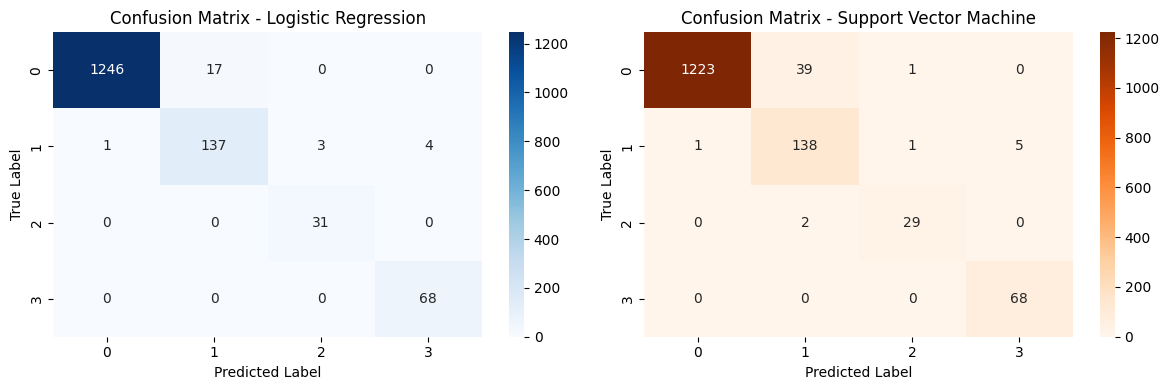

In [482]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))  # 1 baris, 2 kolom

# Logistic Regression
sns.heatmap(confusion_matrix(y_test, y_test_pred_logistic), annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("Confusion Matrix - Logistic Regression")
axes[0].set_xlabel("Predicted Label")
axes[0].set_ylabel("True Label")

# Support Vector Machine
sns.heatmap(confusion_matrix(y_test, y_test_pred_svm), annot=True, fmt='d', cmap='Oranges', ax=axes[1])
axes[1].set_title("Confusion Matrix - Support Vector Machine")
axes[1].set_xlabel("Predicted Label")
axes[1].set_ylabel("True Label")

# show plot
plt.tight_layout()
plt.show()


Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

## Evaluasi Model Logistic Regression dan Support Vector Machine

Berdasarkan hasil evaluasi, **Logistic Regression** memiliki performa yang lebih baik dibandingkan **Support Vector Machine (SVM)** dalam hal **akurasi, precision, recall, dan F1-score** pada data uji.

- **Logistic Regression** mencapai **akurasi uji sebesar 98.34%**, dengan **precision 98.44%**, **recall 98.34%**, dan **F1-score 98.37%**.
- **Support Vector Machine (SVM)** memiliki **akurasi uji 96.75%**, dengan **precision 97.28%**, **recall 96.75%**, dan **F1-score 96.90%**.

Dari confusion matrix, terlihat bahwa **Logistic Regression lebih sedikit melakukan kesalahan klasifikasi dibandingkan SVM**, terutama dalam membedakan kelas mayoritas dan minoritas. Oleh karena itu, **Logistic Regression lebih direkomendasikan untuk dataset ini**.


## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [483]:
# tuning tidak akan dilakukan mengingat hasil dari metrik evaluasi yang sudah cukup tinggi

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [484]:
# tuning tidak akan dilakukan mengingat hasil dari metrik evaluasi yang sudah cukup tinggi

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

2. **Identifikasi Kelemahan Model**  
   - Berdasarkan confusion matrix, **Support Vector Machine (SVM)** memiliki lebih banyak kesalahan klasifikasi dibandingkan **Logistic Regression**, terutama pada kelas mayoritas.  
   - **Precision dan Recall untuk beberapa kelas masih dapat ditingkatkan**, terutama pada kelas minoritas yang lebih sulit diklasifikasikan.  
   - **Overfitting tidak terlalu terlihat**, karena performa pada data latih dan uji tidak memiliki selisih yang terlalu besar. Namun, Logistic Regression menunjukkan performa yang lebih stabil dibandingkan SVM.  

3. **Rekomendasi Tindakan Lanjutan**  
   - **Meningkatkan jumlah data** untuk kelas yang kurang terwakili agar model lebih seimbang dalam klasifikasi.  
   - **Menguji model lain** seperti Gradient Boosting untuk mendapatkan hasil yang lebih baik.  
